
# Project 2 : Investigate a Dataset (Medical Appointment No Shows)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>    
</ul>

<a id='intro'></a>
## Introduction
**Dataset Description**: 
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

- **PatientId:** indicates the patient ID; duplication is possible due to cases where the same patient booked more than one appointment.
- **AppointmentID:** indicates appoint ID, this field should be unique
- **Gender:** indicates the patient's gender (M/F)
- **ScheduledDay:** indicates the Date/Time the patient set up their appointment.
- **AppointmentDay** indicates the date/time the patient called to book their appointment.
- **Age:** indicates the patient's age.
- **Neighborhood:** indicates the location of the hospital.
- **Scholarship:** indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
- **Hipertension:** indicates whether or not the patient is experiencing Hypertension.
- **Diabetes:** indicates whether or not the patient is experiencing Diabetes.
- **Alcoholism:** indicates whether or not the patient is experiencing Alcoholism.
- **Handcap:** indicates whether or not the patient is with special needs.
- **SMS_received:** indicates whether or not the patient has received a reminder text message.
- **Show-up:** ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

**Thanks to:** 
1. The Amazing Instuctors:**Juno Lee & Juan Delgado**
2. TheEngineeringWorld YT Channel https://www.youtube.com/channel/UCcBIq3zYCbiq3jYWAq45q3w
3. codebasics YT Channel https://www.youtube.com/channel/UCh9nVJoWXmFb7sLApWGcLPQ
4. Amigoscode YT channel  https://www.youtube.com/c/amigoscode
**Matplotlib Official Documention** https://matplotlib.org/

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

###  General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [3]:
df.rename(columns=lambda x: x.strip().lower().replace('-','_'), inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   patientid       110527 non-null  float64
 1   appointmentid   110527 non-null  int64  
 2   gender          110527 non-null  object 
 3   scheduledday    110527 non-null  object 
 4   appointmentday  110527 non-null  object 
 5   age             110527 non-null  int64  
 6   neighbourhood   110527 non-null  object 
 7   scholarship     110527 non-null  int64  
 8   hipertension    110527 non-null  int64  
 9   diabetes        110527 non-null  int64  
 10  alcoholism      110527 non-null  int64  
 11  handcap         110527 non-null  int64  
 12  sms_received    110527 non-null  int64  
 13  no_show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.shape

(110527, 14)

Data has dtypes: **float64(1), int64(8), object(5)**

In [6]:
df.isnull().sum()

patientid         0
appointmentid     0
gender            0
scheduledday      0
appointmentday    0
age               0
neighbourhood     0
scholarship       0
hipertension      0
diabetes          0
alcoholism        0
handcap           0
sms_received      0
no_show           0
dtype: int64

**Data has no Null Values**

In [7]:
df.duplicated().sum()

0

**Data has no Duplicates**

The dataset includes **14** columns and **110527** data rows.<br>
**Intial Explore steps**<br>
In the next cells, we will identify the data format and types (Quantitative vs. Categorical) of each column to help us plan and determine the best data analysis strategy to approach this dataset. In order to do that; at first, we will plot the dataframe data using Pandas hist() function to gain a preliminary understanding for the data types; next, we will identify the data type of each column individually using Pandas unique() function to confirm the data type and decide on the type of analysis we will conduct.

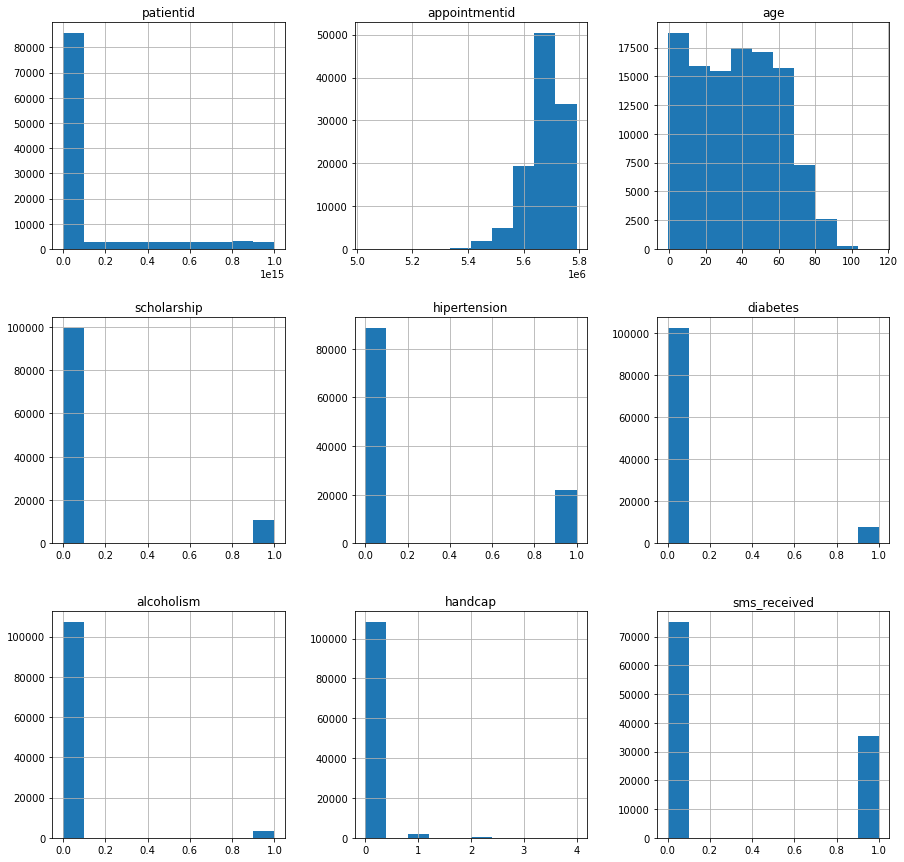

In [8]:
df.hist(figsize=(15,15));

Looking at the charts above, we notice the data frame includes the two types of data:<br>
**1-Categorical Data:** Gender, Diabetes, Alcoholism, Handcap, SMS_received,scholarship,hipertension.<br>
**2-Quantitative Data:** PatientId, AppointmentID, Age, ScheduledDay, AppointmentDay.<br>
In the next section, we will identify the exact types of each column and confirm the data analysis strategy for each column.<br>

**Columns Duplicated Values Validation**<br>
Search every column to see if there  any duplicated values within it.<br>
as we already saw the whole dataset has no duplicats overall. 

In [9]:
# Check for duplicates PatientID column:
sum(df.patientid.duplicated())

48228

Looks like there is 48k duplicated values within patientid column<br> 
that indicates that there is many patients reserved more than once.

In [10]:
# Patient ID values:
df.patientid.value_counts()

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
7.579746e+13    62
                ..
1.779297e+13     1
9.985120e+11     1
3.256827e+13     1
9.232297e+13     1
5.133834e+14     1
Name: patientid, Length: 62299, dtype: int64

**62299 Unique PatientID** and we need to change it to **int** type


In [11]:
# Check for duplicates AppointmentID column:
sum(df.appointmentid.duplicated())

0

In [12]:
# Check for zero/negative AppointmentID
df[df.appointmentid < 0]['appointmentid']

Series([], Name: appointmentid, dtype: int64)

In [13]:
# Check for zero/negative PatientID
df[df.patientid < 0]['patientid']

Series([], Name: patientid, dtype: float64)

AppointmentID shows no duplicates so will use it instead of PatientsID <br>
but meanwhile we should consider that **100K+ appointments is only made by 62299 patients.**<br>
We will reference that when we need to

**Checking Unique Values in all columns**

In [14]:
df.gender.unique()

array(['F', 'M'], dtype=object)

**Gender Column:** is Catgorial and we will use it in our analysis based on Males or Females 

In [15]:
df.scheduledday.unique()

array(['2016-04-29T18:38:08Z', '2016-04-29T16:08:27Z',
       '2016-04-29T16:19:04Z', ..., '2016-04-27T16:03:52Z',
       '2016-04-27T15:09:23Z', '2016-04-27T13:30:56Z'], dtype=object)

In [16]:
df.scheduledday.unique()

array(['2016-04-29T18:38:08Z', '2016-04-29T16:08:27Z',
       '2016-04-29T16:19:04Z', ..., '2016-04-27T16:03:52Z',
       '2016-04-27T15:09:23Z', '2016-04-27T13:30:56Z'], dtype=object)

In [17]:
df.appointmentday.unique()

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z',
       '2016-05-14T00:00:00Z', '2016-06-02T00:00:00Z',
       '2016-06-03T00:00:00Z', '2016-06-06T00:00:00Z',
       '2016-06-07T00:00:00Z', '2016-06-01T00:00:00Z',
       '2016-06-08T00:00:00Z'], dtype=object)

**Hour is equal to zero so we will exclude appointmentday hour**

In [18]:
df.age.nunique()

104

**104** is a Strange Number for unique age values which needs further investigation.

In [19]:
df.age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: age, Length: 104, dtype: int64

**we need to put an age range for this column** 

In [20]:
df.age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

so our patients age range is from 115 to few months years old <br> 
and we have a negative value which we will be exclude. 

In [21]:
df.neighbourhood.unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [22]:
df.neighbourhood.value_counts().head(15)

JARDIM CAMBURI       7717
MARIA ORTIZ          5805
RESISTÊNCIA          4431
JARDIM DA PENHA      3877
ITARARÉ              3514
CENTRO               3334
TABUAZEIRO           3132
SANTA MARTHA         3131
JESUS DE NAZARETH    2853
BONFIM               2773
SANTO ANTÔNIO        2746
SANTO ANDRÉ          2571
CARATOÍRA            2565
JABOUR               2509
SÃO PEDRO            2448
Name: neighbourhood, dtype: int64

In [23]:
df.neighbourhood.value_counts().head(15).sum()

53406

In [24]:
df.neighbourhood.describe()

count             110527
unique                81
top       JARDIM CAMBURI
freq                7717
Name: neighbourhood, dtype: object

In [25]:
df.groupby('neighbourhood').median()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
neighbourhood,,,,,,,,,
AEROPORTO,3.124634e+13,5675354.5,58.0,0.0,0.0,0.0,0.0,0.0,0.0
ANDORINHAS,3.388363e+13,5678119.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0
ANTÔNIO HONÓRIO,3.838255e+13,5671883.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0
ARIOVALDO FAVALESSA,3.292737e+13,5691465.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0
BARRO VERMELHO,3.262793e+13,5691804.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
SÃO JOSÉ,3.618476e+13,5684753.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0
SÃO PEDRO,3.228869e+13,5686443.5,36.0,0.0,0.0,0.0,0.0,0.0,0.0
TABUAZEIRO,3.163357e+13,5678352.5,34.0,0.0,0.0,0.0,0.0,0.0,0.0


**We have 81 different Neighbourhoods in the program**, we need to limit it to the top 15

In [26]:
df.scholarship.unique()

array([0, 1], dtype=int64)

In [27]:
df.hipertension.unique()

array([1, 0], dtype=int64)

In [28]:
df.diabetes.unique()

array([0, 1], dtype=int64)

In [29]:
df.alcoholism.unique()

array([0, 1], dtype=int64)

In [30]:
df.handcap.unique()

array([0, 1, 2, 3, 4], dtype=int64)

**handcap column:** it have 5 values 

In [31]:
df.sms_received.unique()

array([0, 1], dtype=int64)

In [32]:
df.no_show.unique()

array(['No', 'Yes'], dtype=object)

In [33]:
df['no_show'].value_counts()

No     88208
Yes    22319
Name: no_show, dtype: int64

**no_show column:** is Catagorial <br> 
the amount of patients show up for their appointments is three times higher than who doesn't

##### Summery of Data Wrangling:
1. we need to change the patiend id column to integer 
2. we need to add a weekday column to analyize which day has the most no show apperance 
3. we need to make an age range 
4. we need to limit neighbourhood to top 15.

### Data Cleaning 

**1- Change Columns Types**

In [34]:
# Change the Patient ID Column to type int: 
df.patientid = (df.patientid.astype('int64'))

**2- Adjust the Dates Columns**

In [35]:
# Appointment Date
df['appointmentdate'] = pd.to_datetime(df['appointmentday']).dt.date
df['dayofweek'] = pd.to_datetime(df['appointmentday']).dt.day_name()
df.drop('appointmentday',axis=1, inplace = True)

In [36]:
df.dayofweek.value_counts().to_frame(name='Number of Appointments')

,Number of Appointments
Wednesday,25867
Tuesday,25640
Monday,22715
Friday,19019
Thursday,17247
Saturday,39


- Convert AppointmentDay and ScheduledDay from String to DateTime format, and 
- create 2 columns for: appointment booking date and the appointment date. 
- Since the Appointment times were set to zero in all the appointments, we shall neglect it.

**3- Group the Age column to be easy to analysis:**

In [37]:
df['agerange'] = pd.cut(df.age, bins=[0, 18, 40, 60, 80, 120])
df['agerange'].value_counts()

(18, 40]     31817
(40, 60]     30081
(0, 18]      25327
(60, 80]     16910
(80, 120]     2852
Name: agerange, dtype: int64

In [38]:
df.head(3)

,patientid,appointmentid,gender,scheduledday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,appointmentdate,dayofweek,agerange
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,Friday,"(60, 80]"
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,Friday,"(40, 60]"
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,Friday,"(60, 80]"


In [39]:
# Create a funtion to calculate the plot the group proportions based on one variable by number of appointments
# you can't make pie Chart as global variable as the indcies change with each function.
def plotbyvar(df, var):
    df_pie = df[var].value_counts()
    ax = df_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12, shadow=True, startangle=90);
    ax.set_title(var + ' (%) (Per appointment)\n', fontsize = 15);
    return np.round(df_pie/df.shape[0]*100,2)

In [40]:
# Create a function to plot the noshow-up % for two variables (i.e. gender and hypertention)

def noshow(df,var1, var2):
    df_comm = pd.crosstab(df[var1], columns = df[var2], normalize = 'index')
    df_comm = np.round(df_comm * 100,2)
    ax = df_comm.plot.barh(stacked = True,figsize=(10,5));
    ax.set_title('\nNo ShowUp (%) (by ' + str(var1) + ' & '+ str(var2) + ')\n', fontsize = 15);
    ax.set_ylabel(df_comm.index.name, fontsize = 12)
    ax.set_xlabel('(%)', fontsize = 12)
    vals = ax.get_xticks()
    ax.set_xticklabels(['{:3.0f}%'.format(x) for x in vals])
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    return df_comm

In [41]:
# Create a function to plot the Hypertension % for two variables
def Hyper(df,var1, var2):
    df_comm = pd.crosstab(df[var1], columns = df[var2], normalize = 'index')
    df_comm = np.round(df_comm * 100,2)
    ax = df_comm.plot.barh(stacked = True,figsize=(10,5));
    ax.set_title('\nHypertension (%) (by ' + str(var1) + ' & '+ str(var2) + ')\n', fontsize = 15);
    ax.set_ylabel(df_comm.index.name, fontsize = 12)
    ax.set_xlabel('(%)', fontsize = 12)
    vals = ax.get_xticks()
    ax.set_xticklabels(['{:3.0f}%'.format(x) for x in vals])
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    return df_comm

<a id='eda'></a>
## Exploratory Data Analysis
*as the DataSet Description states that the most importanta question is why no patients appear for their appointments.*
**Dataset Description: This dataset collects information from 100k medical appointments in Brazil and is <font color='red'>focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row <font>.**<br>
<br>   
1. What is the overall appointment show-up vs. no show-up rate?  
2. What is the characteristics that effect no Show up rate ? 
3. Does Hypertension has an effect on gender ? and does it connect with other diseases ?  

### Research Question 1: <font color='green'> What is the overall appointment show-up vs. no show-up rate?<font>

No     79.81
Yes    20.19
Name: no_show, dtype: float64

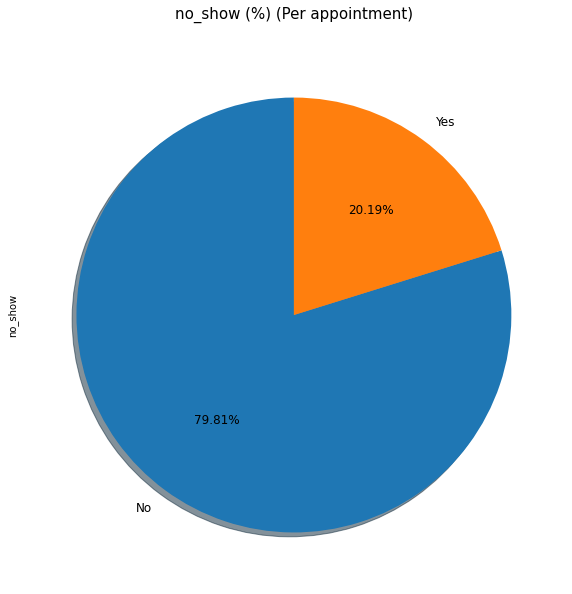

In [42]:
plotbyvar(df, 'no_show')

Looking at the pie chart above, the overall show-up rate is **79.81**%.

### Research Question 2 : <font color='green'>What is the characteristics that effect no Show up rate ?<green>

#### Q2.1:  SMS Received. 

<ipython-input-40-5f4023af7787>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:3.0f}%'.format(x) for x in vals])


no_show,No,Yes
sms_received,,
0,83.30,16.70
1,72.43,27.57


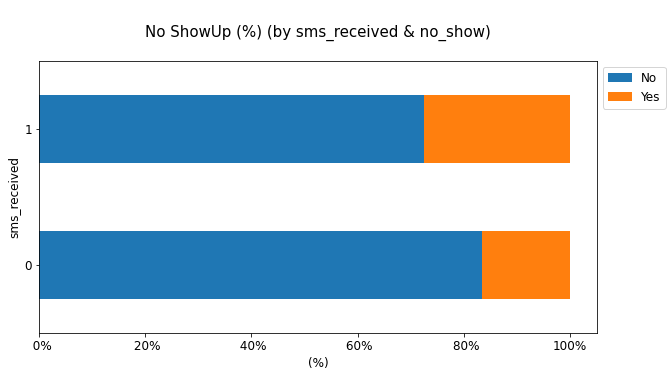

In [43]:
noshow(df, 'sms_received', 'no_show')

**Patients who recives Sms are likely to show up**

#### Q2.2:  Gender.

F    65.0
M    35.0
Name: gender, dtype: float64

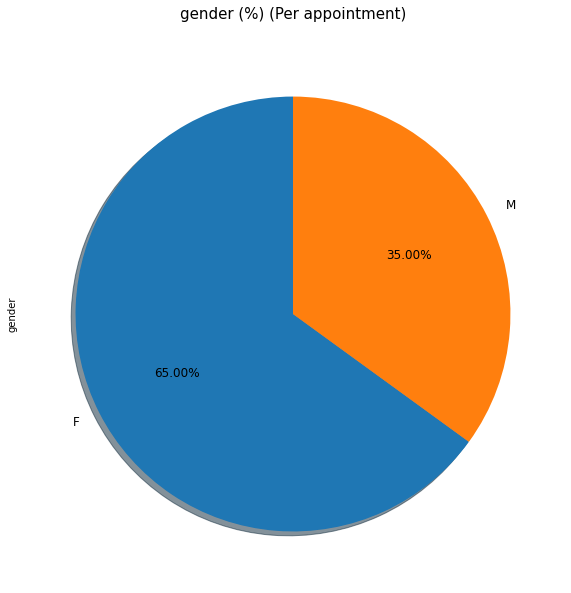

In [44]:
plotbyvar(df, 'gender')

<ipython-input-40-5f4023af7787>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:3.0f}%'.format(x) for x in vals])


no_show,No,Yes
gender,,
F,79.69,20.31
M,80.03,19.97


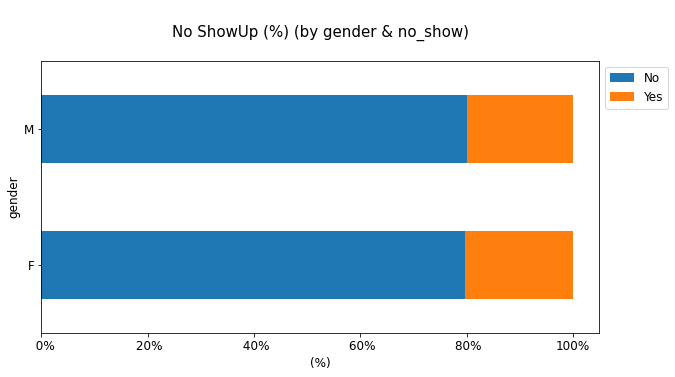

In [45]:
noshow(df, 'gender', 'no_show')

**Gender doesn't effect on the appearence of patients to their appointments**

#### Q2.3:  Day of the Week.

Wednesday    23.40
Tuesday      23.20
Monday       20.55
Friday       17.21
Thursday     15.60
Saturday      0.04
Name: dayofweek, dtype: float64

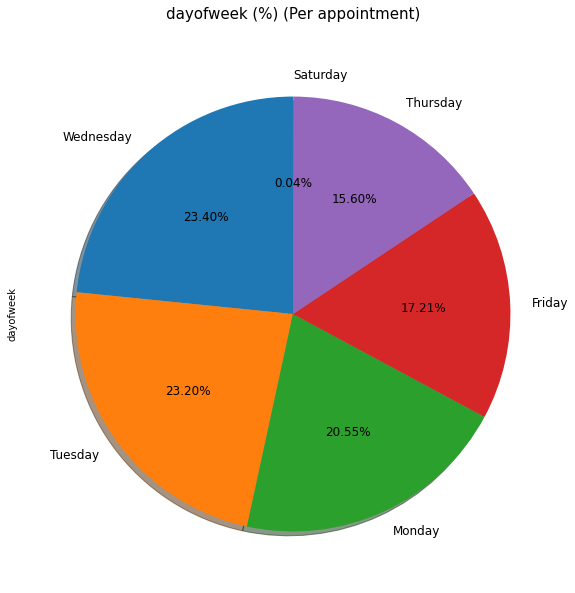

In [46]:
plotbyvar(df, 'dayofweek')

<ipython-input-40-5f4023af7787>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:3.0f}%'.format(x) for x in vals])


no_show,No,Yes
dayofweek,,
Friday,78.77,21.23
Monday,79.35,20.65
Saturday,76.92,23.08
Thursday,80.65,19.35
Tuesday,79.91,20.09
Wednesday,80.31,19.69


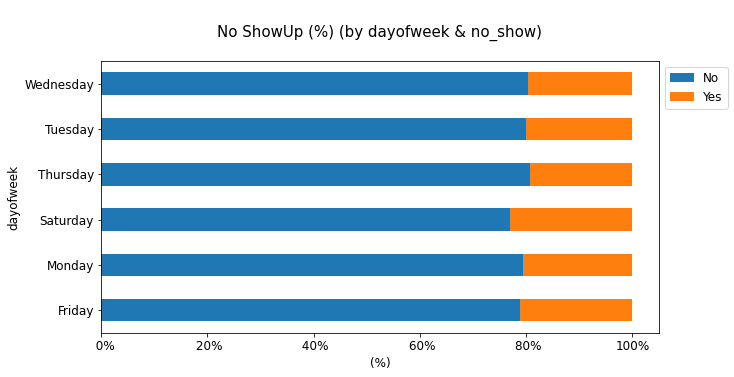

In [47]:
noshow(df, 'dayofweek', 'no_show')

#### Q2.4:  Alcoholism

0    96.96
1     3.04
Name: alcoholism, dtype: float64

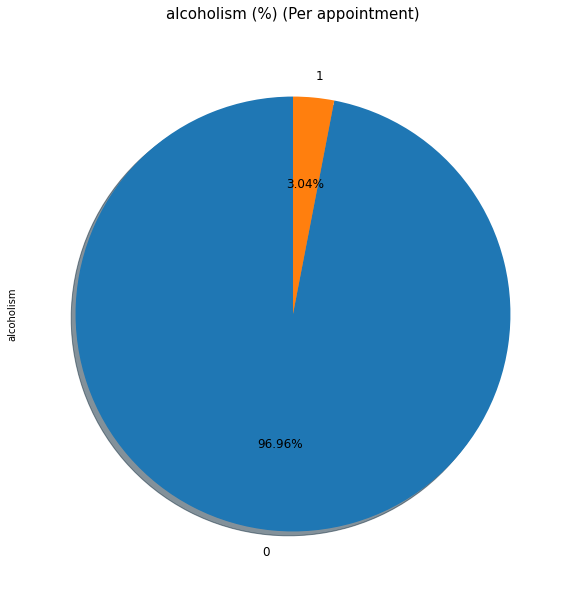

In [48]:
plotbyvar(df, 'alcoholism')

<ipython-input-40-5f4023af7787>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:3.0f}%'.format(x) for x in vals])


no_show,No,Yes
alcoholism,,
0,79.81,20.19
1,79.85,20.15


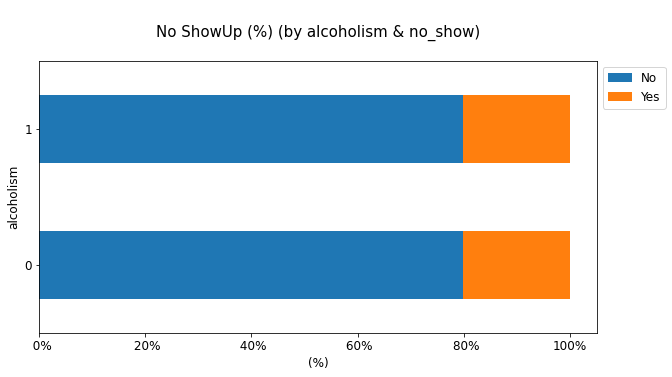

In [49]:
noshow(df, 'alcoholism', 'no_show')

**Alcoholism doesn't effect on the appearence of patients to their appointments**

#### Q2.5:  Age.

(18, 40]     28.79
(40, 60]     27.22
(0, 18]      22.91
(60, 80]     15.30
(80, 120]     2.58
Name: agerange, dtype: float64

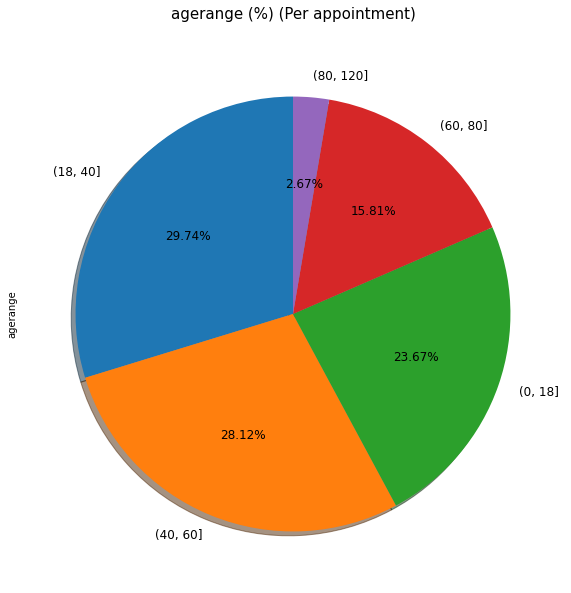

In [50]:
plotbyvar(df, 'agerange')

**Age Groups** 
1. from [0  - 18] form **23%** from the total patients
2. from [18 - 40] form **30%** from the total patients
3. from [40 - 60] form **28%** from the total patients
4. from [60 - 80] form **16%** from the total patients
5. from [80 -120] form **3%** from the total patients


<ipython-input-40-5f4023af7787>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:3.0f}%'.format(x) for x in vals])


no_show,No,Yes
agerange,,
"(0, 18]",77.46,22.54
"(18, 40]",76.82,23.18
"(40, 60]",81.41,18.59
"(60, 80]",85.00,15.00
"(80, 120]",83.56,16.44


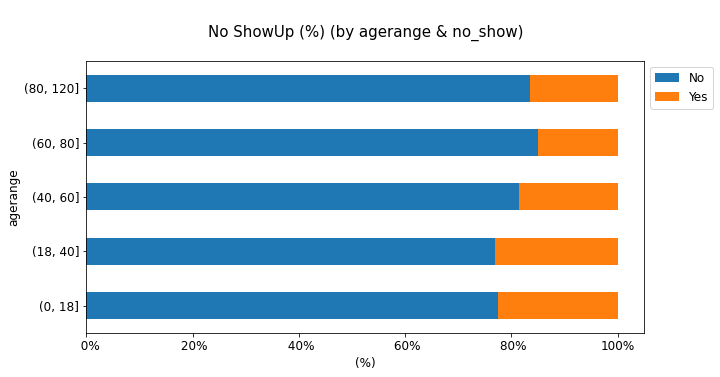

In [51]:
noshow(df, 'agerange', 'no_show')

**this Chart shows that the patients whoes ages is in range from 0 - 40 doesn't show to their appointments in higher rate than people from other age groups.**

#### Q2.6: Scholarship.

0    90.17
1     9.83
Name: scholarship, dtype: float64

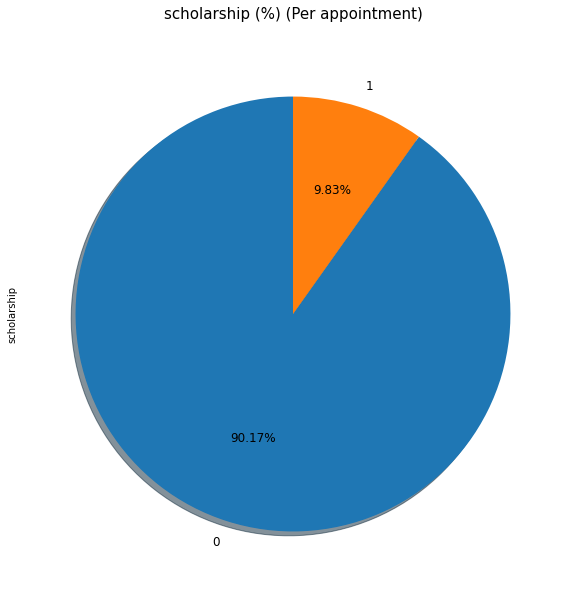

In [52]:
plotbyvar(df, 'scholarship')

**10% of the patients are within the Scholarship**

<ipython-input-40-5f4023af7787>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:3.0f}%'.format(x) for x in vals])


no_show,No,Yes
scholarship,,
0,80.19,19.81
1,76.26,23.74


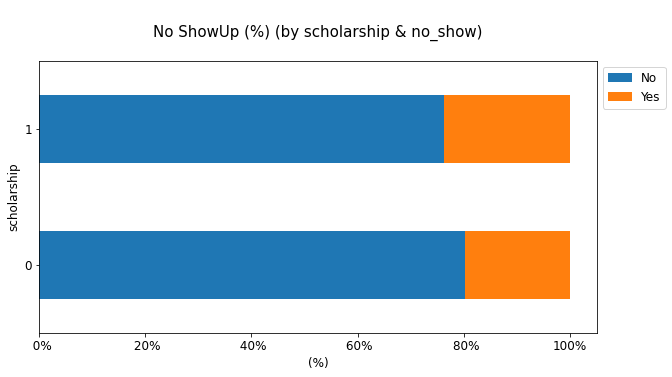

In [53]:
noshow(df, 'scholarship', 'no_show')

**Patients without Scholarship have a Slightly higher Chance to show up**

#### Q2.7: hypertension

0    80.28
1    19.72
Name: hipertension, dtype: float64

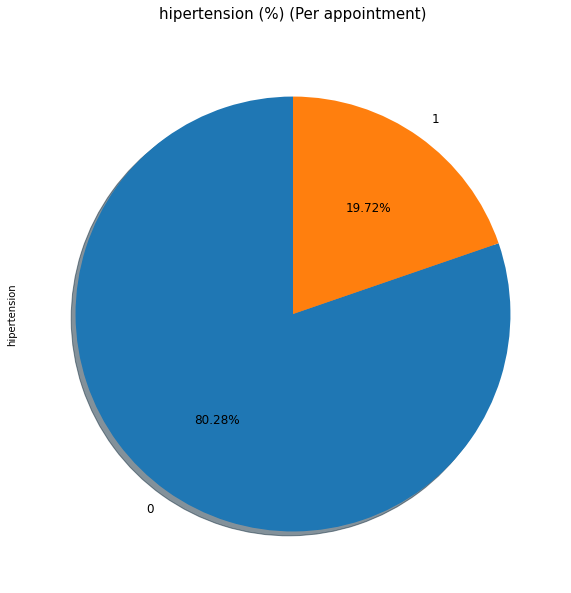

In [54]:
plotbyvar(df, 'hipertension')

**20% of patients have Hypertension.**

<ipython-input-40-5f4023af7787>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:3.0f}%'.format(x) for x in vals])


no_show,No,Yes
hipertension,,
0,79.1,20.9
1,82.7,17.3


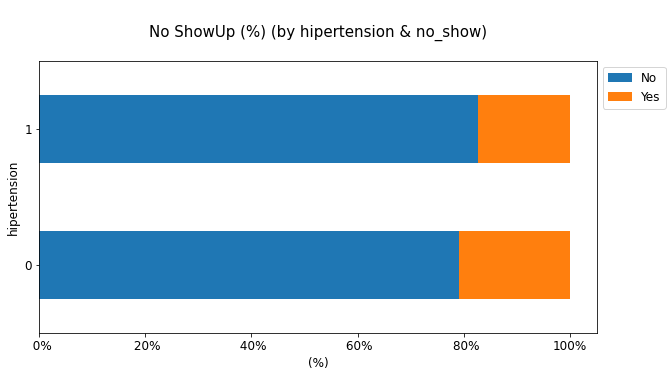

In [55]:
noshow(df, 'hipertension', 'no_show')

**Patients without Hypertension have a Slightly higher Chance to show up**

#### Q2.8:  diabetes.

0    92.81
1     7.19
Name: diabetes, dtype: float64

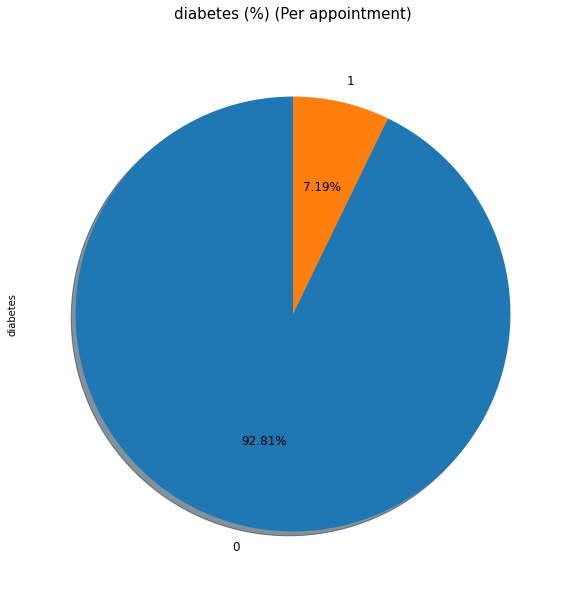

In [56]:
plotbyvar(df, 'diabetes')

**7% of the patients have Diabetes**

<ipython-input-40-5f4023af7787>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:3.0f}%'.format(x) for x in vals])


no_show,No,Yes
diabetes,,
0,79.64,20.36
1,82.00,18.00


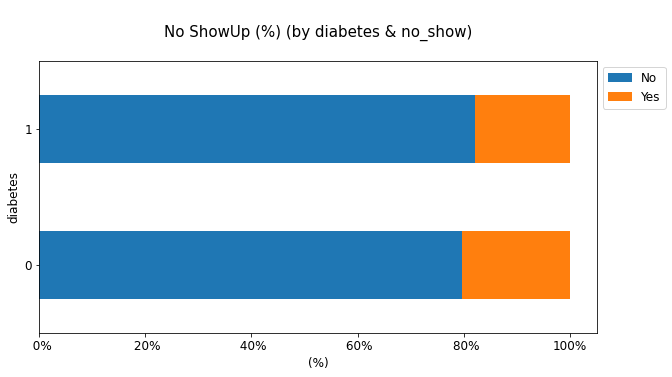

In [57]:
noshow(df, 'diabetes', 'no_show')

**Diabetes doesn't effect on the appearence of patients to their appointments**

### Research Question 2 : <font color='green'>Does Hypertension has an effect on gender ? and does it connect with other diseases ? ?<green>

#### Q3.1:  Gender.

<ipython-input-41-9ef24acb21a3>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:3.0f}%'.format(x) for x in vals])


hipertension,0,1
gender,,
F,78.65,21.35
M,83.30,16.70


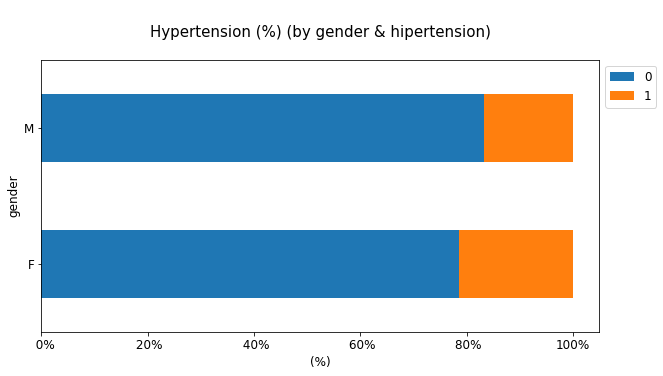

In [58]:
Hyper(df, 'gender', 'hipertension')

**Females have a Slightly higher Chance to have Hypertension**

#### Q3.2:  Alcoholism.

<ipython-input-41-9ef24acb21a3>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:3.0f}%'.format(x) for x in vals])


hipertension,0,1
alcoholism,,
0,80.90,19.10
1,60.51,39.49


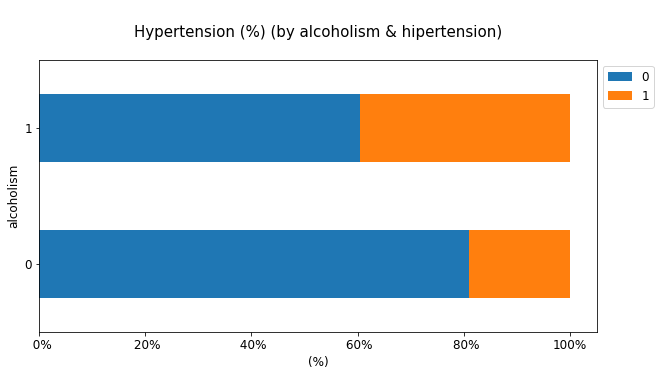

In [59]:
Hyper(df, 'alcoholism', 'hipertension')

#### Q3.3 Weekday

**Patients with Alcoholism is have Higher chances to have Hypertension**

<ipython-input-41-9ef24acb21a3>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:3.0f}%'.format(x) for x in vals])


hipertension,0,1
dayofweek,,
Friday,80.27,19.73
Monday,80.67,19.33
Saturday,51.28,48.72
Thursday,79.89,20.11
Tuesday,79.99,20.01
Wednesday,80.51,19.49


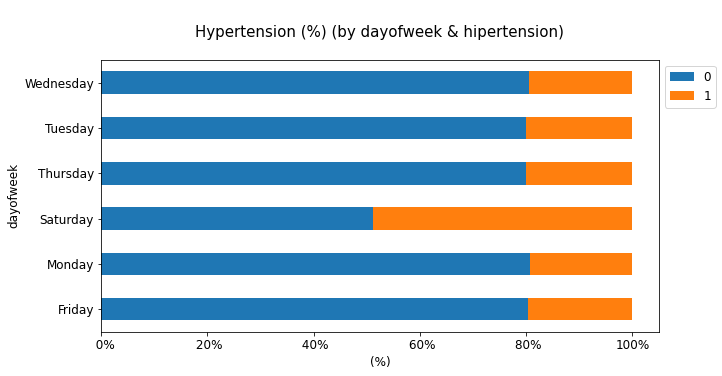

In [60]:
Hyper(df, 'dayofweek', 'hipertension')

**At Saturday the Percent of Hypertension Increase Significantly. 
we need deep analysis to understand why**

<a id='conclusions'></a>
## Conclusions
### Upon Question 1 
**The overall show-up rate is: 79.81%**

### Upon Question 2
A1. The overall show-up rate is: 79.81%
<br>
A2. The (%) of female patients is greater than male patients (64.28% vs 35.72%)
<br>**Gender doesn't effect on the appearence of patients to their appointments**

A3.  
- from [0 - 18] form 23% from the total patients
- from [18 - 40] form 30% from the total patients
- from [40 - 60] form 28% from the total patients
- from [60 - 80] form 16% from the total patients
- from [80 -120] form 3% from the total patients 

**this Chart shows that the patients whoes ages is in range from 0 - 40 doesn't show to their appointments in higher rate than people from other age groups.**

A4. The (%) of patients who have a scholarship is 9.29%<br>
**Patients without Scholarship have a Slightly higher Chance to show up**

A5. The (%) of patients who experiance hypertension is 19.65%<br>
**Patients with Hypertension have a Slightly higher Chance to show up**

A6. The (%) of patients who experiance diabetes is 7.09%<br>
**Diabetes doesn't effect on the appearence of patients to their appointments**

A7. The (%) of patients who experiance alcoholism is 3%<br>
**Alcoholism doesn't effect on the appearence of patients to their appointments**

A8. The (%) of patients who received an SMS reminder is 36.41%<br>
**Patients who recives Sms are likely to show up**


### Upon Question 3
1. At Saturday the Percent of Hypertension Increase Significantly. 
2. Patients with Alcoholism is have Higher chances to have Hypertension
3. Females have a Slightly higher Chance to have Hypertension

<a id='limitations'></a>
## Limitations

1. Most of the calculations performed in this project are based on the number of apppointments not patients. 
2. We were not able to address the time dimenion as the appointments times were set to 00:00:00
3. As we were not able to obtain sufficient explanation on specific cases where data was not consistent.
4. As most of the columns represent categorical data, and given the type of questions/analysis selected, the visualization charts were mainly (stacked) bar charts, pie charts; Histograms and other quantitative-related charts such as scatter diagrams, were excluded from this project to the same reason above.